## LOGISTIC REGRESSION USING DIABETES DATASET

#### Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the file

In [23]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Input X and Output Y

In [24]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

#### Splitting the dataset to train and test. 80% of data is used for training the model and 20% of it is used to test the performance of our model. 

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

#### Perform Feature Scaling here values lie in different ranges.

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[ 0.90832902  0.91569367  0.44912368  0.52222619  0.3736349   0.37852648
   0.67740401  1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103  0.14814855 -0.69965674 -0.50667229
  -0.07049698 -0.96569189]
 [-1.12606292  1.38763205  1.06340683  0.77161128  5.09271083  2.54094063
  -0.11855487 -0.88240283]
 [-0.8354355  -0.37427121 -0.67706208  0.02345601  0.45029859 -0.88604319
   1.10091422 -0.88240283]
 [ 1.19895644 -0.02818307 -3.54371676 -1.28581572 -0.69965674 -0.27904975
  -0.85143778  0.36693308]
 [ 2.0708387   0.4437553  -3.54371676 -1.28581572 -0.69965674  2.54094063
   0.33499151  0.5335112 ]
 [ 1.78021128  1.26178181 -0.06277894  0.14814855  0.42474402 -0.8481061
  -0.42192034  1.11653462]
 [ 0.6177016   2.30004623  0.44912368 -1.28581572 -0.69965674 -1.10102004
  -1.01363317  2.11600335]
 [-0.8354355  -1.56984843 -1.08658418 -0.16358281 -0.05227448 -1.49303664
  -0.43093119 -0.96569189]
 [-0.54480808  0.03474204 -0.47230103 -0.16358281  0.20327115 -0.30434114
   0.75249448 -0.9

#### Training our Logistic Regression model. 

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

#### Predict Test Data

In [41]:
y_pred = classifier.predict(xtest)


#### Test Performance (Confusion Matrix)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[98  9]
 [18 29]]


#### Performance Measure (Accuracy)

In [43]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8246753246753247


#### Visualization of Performance Model

Text(0.5, 257.44, 'Predicted label')

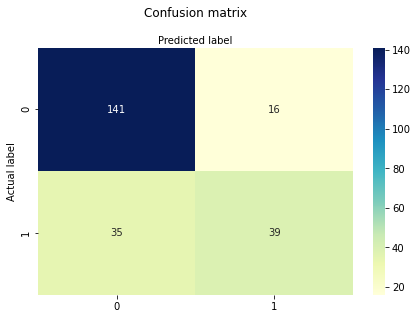

In [37]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')